# Set Membership

The cell below defines two **abstract classes**: the first represents a set and basic insert/search operations on it. You will need to impement this API four times, to implement (1) sequential search, (2) binary search tree, (3) balanced search tree, and (4) bloom filter. The second defines the synthetic data generator you will need to implement as part of your experimental framework. <br><br>**Do NOT modify the next cell** - use the dedicated cells further below for your implementation instead. <br>

In [57]:
# DO NOT MODIFY THIS CELL

from abc import ABC, abstractmethod  

# abstract class to represent a set and its insert/search operations
class AbstractSet(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # inserts "element" in the set
    # returns "True" after successful insertion, "False" if the element is already in the set
    # element : str
    # inserted : bool
    @abstractmethod
    def insertElement(self, element):     
        inserted = False
        return inserted   
    
    # checks whether "element" is in the set
    # returns "True" if it is, "False" otherwise
    # element : str
    # found : bool
    @abstractmethod
    def searchElement(self, element):
        found = False
        return found    
    
    
    
# abstract class to represent a synthetic data generator
class AbstractTestDataGenerator(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # creates and returns a list of length "size" of strings
    # size : int
    # data : list<str>
    @abstractmethod
    def generateData(self, size):     
        data = [""]*size
        return data   


Use the cell below to define any auxiliary data structure and python function you may need. Leave the implementation of the main API to the next code cells instead.

In [58]:
# ADD AUXILIARY DATA STRUCTURE DEFINITIONS AND HELPER CODE HERE

# Bloom filter helper code:

# BST helper code:
class NodeBST():
    def __init__(self, value):
        self.value = value
        self.right_node=None
        self.left_node  = None
      
    def insert(self, value):
        if value > self.value and self.right_node:
            self.right_node.insert(value)
        elif value < self.value and self.left_node:
            self.left_node.insert(value)
        elif value > self.value:
            new_node  = NodeBST(value)
            self.right_node = new_node
            return True
        elif value < self.value:
            new_node  = NodeBST(value)
            self.left_node = new_node
            return True
        return False
      
    def search(self, value):
        if value > self.value and self.right_node:
            return self.right_node.search(value)
        elif value < self.value and self.left_node:
            return self.left_node.search(value)
        
        elif (value == self.value):
            return True
        else:
            return False
    
    def print_tree(self):
        
        print(self.value)
        
        if self.left_node:
            self.left_node.print_tree()
            
        if self.right_node:
            self.right_node.print_tree()

In [59]:
# Balanced Tree helper code

# Time complexity = O(logN)
# Space complexity = O(n)
class BalancedNode:
    def __init__(self, value):
        self.left = None
        self.parent = None
        self.right = None
        self.value = value
        self.colour = "R"



In [60]:
class Node:
    def __init__(self, data=None, next=None):
        self.data = data
        self.next = next

class SequentialSearchSet(AbstractSet):
    def __init__(self):
        self.head = None

    def insertElement(self, element):
        node = Node(element, self.head)
        self.head = node
    
    #def insertElement(self, element):
        #if self.head is None:
            #self.head = Node(element, None)
            #return
            
        
        #node = self.head
        #while node.next is not None:
            #node = node.next
        
        #node.next = Node(element, None)


    def searchElement(self, element):
        search_node = self.head
        while search_node is not None:
            if search_node.data == element:
                return True
            search_node = search_node.next
        return False
    
    def print(self):
        if self.head is None:
            print("Empty linked list")
            return

        node = self.head # Iterator will start at the beginning of the linked list
        linked_list_string = '' # Linked list string to print out the list of elements
        while node is not None:
            linked_list_string += str(node.data) + '-->'
            node = node.next # Following the linked list and iterating through elements one by one

        print(linked_list_string)


In [61]:
linked_list = SequentialSearchSet()
linked_list.insertElement(5)
linked_list.insertElement(2)
linked_list.print()
linked_list.searchElement(5)

2-->5-->


True

Use the cell below to implement the requested API by means of **sequential search**.

In [62]:
class SequentialSearchSet(AbstractSet):
    
    def __init__(self):
        self.words = []
                
    def insertElement(self, element):
        inserted = False
        for value in self.words:
            if value == element:
                return inserted
        self.words.append(element)
        inserted = True
      
        return inserted
    

    def searchElement(self, element):
        
        found = False
        for value in self.words:
            if value == element:
                found = True
                return found
        
        return found

Use the cell below to implement the requested API by means of **binary search tree**.

In [63]:
class BinarySearchTreeSet(AbstractSet):
    
    def __init__(self):
        self.root = NodeBST("0")
        
    def insertElement(self, element):
        inserted = False
        inserted = self.root.insert(element)
        return inserted

    def searchElement(self, element):     
        found = False
        found = self.root.search(element)
        return found    

Use the cell below to implement the requested API by means of **balanced search tree**.

In [64]:

class BalancedSearchTreeSet(AbstractSet):
    def __init__(self): # code to initialize the tree structure 
        self.empty = BalancedNode("")
        self.empty.colour = "B"
        self.empty.left = None
        self.empty.right = None
        self.root = self.empty
        

    def insertElement(self, element): 
        # This function adds the node to be inserted like a binary tree
        # It gives it the initial colour of red, but if it is the root it changes the colour to black
        # Returns inserted if no further operations are needed (best case scenario), otherwise calls another function
        inserted = False
        node = BalancedNode(element)
        node.parent = None
        node.value = element
        node.colour = "R"
        node.left = self.empty
        node.right = self.empty

        tempval = None
        rt = self.root

        while rt != self.empty:
            tempval = rt
            if node.value < rt.value:
                rt = rt.left
            else:
                rt = rt.right

        node.parent = tempval

        if tempval == None:
            self.root = node
        elif node.value < tempval.value:
            tempval.left = node
        else:
            tempval.right = node

        if node.parent == None:
            node.colour = "B"
            inserted = True
            return inserted

        if node.parent.parent == None:
            inserted = True
            return inserted

        self.insertcontinue(node)
        return inserted

    def search(self, node, value):
        # Searches similarly to a binary tree
        found = False
        if node == self.empty:
            return found
        elif value == node.value:
            found = True
            return found
        if value < node.value:
            return self.search(node.left, value)
        return self.search(node.right, value)

    def leftrotate(self, rotateval):
        # Rotates the tree to the left around a particular node
        rchild = rotateval.right
        rotateval.right = rchild.left
        if rchild.left != self.empty:
            rchild.left.parent = rotateval
        rchild.parent = rotateval.parent
        if rotateval.parent == None:
            self.root = rchild
        elif rotateval == rotateval.parent.left:
            rotateval.parent.left = rchild
        else:
            rotateval.parent.right = rchild
        rchild.left = rotateval
        rotateval.parent = rchild

    def rightrotate(self, rotateval):
        # Rotates the tree to the right around a particular node
        lchild = rotateval.left
        rotateval.left = lchild.right
        if lchild.right != self.empty:
            lchild.right.parent = rotateval
        lchild.parent = rotateval.parent
        if rotateval.parent == None:
            self.root = lchild
        elif rotateval == rotateval.parent.right:
            rotateval.parent.right = lchild
        else:
            rotateval.parent.left = lchild
        lchild.right = rotateval
        rotateval.parent = lchild

    def colourswap(self, a, l):
        # If called, this changes the colour of the grandparent of the node being colourswapped to RED
        # It also changes the colour of the aunt and the parent to BLACK
        if a.colour == "R":
            a.colour = "B"
            l.parent.colour = "B"
            l.parent.parent.colour = "R"
            l = l.parent.parent

    def insertcontinue(self, leaf):
        # This function is only called if there are 2 red nodes adjacent to one another
        # It then locates the aunt, and depending on the aunts colour it performs actions to self-balance itself
        while leaf.parent.colour == "R":
            if leaf.parent == leaf.parent.parent.right:
                # This line differentiates the left and right subtrees of the main root
                aunt = leaf.parent.parent.left
                if aunt.colour == "R":
                    # If the aunt is red, a colourswap is conducted
                    self.colourswap(aunt, leaf)
                    leaf = leaf.parent.parent
                else:
                    #Otherwise, a right-left rotation is conducted
                    if leaf == leaf.parent.left:
                        leaf = leaf.parent
                        self.rightrotate(leaf)
                    leaf.parent.colour = "B"
                    leaf.parent.parent.colour = "R"
                    self.leftrotate(leaf.parent.parent)
            else:
                # This section operates with the right subtree of the main root
                aunt = leaf.parent.parent.right
                if aunt.colour == "R":
                    self.colourswap(aunt, leaf)
                    leaf = leaf.parent.parent
                else:
                    # If the aunt is black, then a left-right rotation is conducted
                    if leaf == leaf.parent.right:
                        leaf = leaf.parent
                        self.leftrotate(leaf)
                    leaf.parent.colour = "B"
                    leaf.parent.parent.colour = "R"
                    self.rightrotate(leaf.parent.parent)
            if leaf == self.root:
                break
            self.root.colour = "B"

           

    def searchElement(self, element):
        #This initializes the search function from the root
        return self.search(self.root, element)

    def printTree(self, node, last):
        #Prints the root for easy visualization
        if node != self.empty:
            if last:
                print("R: ", end=" ")

            else:
                print("L: ", end=" ")
            s_color = "RED" if node.colour == "R" else "BLACK"
            print(str(node.value) + "(" + s_color + ")")
            self.printTree(node.left, False)
            self.printTree(node.right, True)

    # Function to call print
    def display(self):
        self.printTree(self.root, True)

# if __name__ == "__main__":
#         tree = BalancedSearchTreeSet()
#         tree.insertElement("spaces")
#         tree.insertElement("main")
#         tree.insertElement("store")
#         tree.insertElement("python")
#         tree.insertElement("display")
#         tree.insertElement("navigate")
#         tree.insertElement("window")
#         tree.insertElement("packages")

#         tree.display()

#         a = tree.searchElement("hello")
#         b = tree.searchElement("window")
#         print(a)
#         print(b)

# # if __name__ == "__main__":
# #     tree = BalancedSearchTreeSet()
# #     file = open("./test3-dickens.txt", "r")
# #     test_file = open("./test-search.txt", "r")
# #     for line in file:
# #         for word in line.split():
# #             tree.insert(word)
# #     for word in test_file:
# #         word = word.strip()
# #         if not tree.searchtree(word):

# #             print(word, " is not present in the tree")

Use the cell below to implement the requested API by means of **bloom filter**.

In [65]:
class BloomFilterSet(AbstractSet):
    
    def __init__(self):
        # ADD YOUR CODE HERE
        self.size = 9161520
        self.hash_count = 5
        self.bit_array = [0] * self.size
        self.hash_functions = self.generate_hash_functions()
    
    def generate_hash_functions(self): # Code to generate a list of unique hash functions
            hash_fuctions = []
            for i in range(1,self.hash_count+1):
                hash_fuctions.append(self.generate_hash_function(i))
            return hash_fuctions
    
    def generate_hash_function(self,seed): # Code to generate a unique hash function based on an inputed seed value
        def hash_function(value):
            return hash(value + str(seed)) % self.size
        return hash_function
        
    def insertElement(self, element):
        inserted = False
        # ADD YOUR CODE HERE
        for hash_function in self.hash_functions:
            self.bit_array[hash_function(element)] = 1
        inserted = True
        
        return inserted

    def searchElement(self, element):     
        found = False
        # ADD YOUR CODE HERE
        for hash_function in self.hash_functions:
            if self.bit_array[hash_function(element)] == 0:
                return found
        found = True
        return found    

Use the cell below to implement the **synthetic data generator** as part of your experimental framework.

In [66]:
import string
import random
from collections import deque

class TestDataGenerator(AbstractTestDataGenerator):
    
    def __init__(self, punctuation=False, length=7, lower=True, upper=True, digits=True):
        self.length = length
        self.lower = lower
        self.upper = upper
        self.digits = digits
        self.punctuation = punctuation

    def getCharacters(self):
        character = ''
        if self.lower:
            character += string.ascii_lowercase
        if self.upper:
            character += string.ascii_uppercase
        if self.digits:
            character += string.digits
        if self.punctuation:
            character += string.punctuation

        return character

        
    def generateData(self, size):     
        data = []
        characters = self.getCharacters()

        for i in range(size):
            data.append(''.join(random.choices(characters, k=random.randint(3,self.length))))
        
        return data
    
    def generateSorted(self, size):     # this is the worst case scenario for BST and balanced
        return sorted(self.generateData(size))
    
    def generateReverseSorted(self, size):
        return sorted(self.generateData(size), reverse=True) 
    def generateBestCaseBinary(self, size):

        class BSTBuilder:
            def __init__(self, value):
                self.value = value
                self.left = None
                self.right = None

        def build_balanced_bst(strings):
            if not strings:
                return None
            
            mid = len(strings) // 2
            root = BSTBuilder(strings[mid])
            root.left = build_balanced_bst(strings[:mid])
            root.right = build_balanced_bst(strings[mid+1:])
            return root

        def generate_balanced_bst_data():
            result = []
            root = build_balanced_bst(self.generateSorted(size))

            queue = deque([root])
            current_level = 1
            next_level = 0
            while queue:
                node = queue.popleft()
                result.append(node.value)
                current_level -= 1
                
                if node.left:
                    queue.append(node.left)
                    next_level += 1
                if node.right:
                    queue.append(node.right)
                    next_level += 1
                
                if current_level == 0:
                    current_level = next_level
                    next_level = 0
            return result

        return generate_balanced_bst_data()


    

test = TestDataGenerator(False, 10, True, False)
print(test.generateData(15))
print(test.generateSorted(5))
print(test.generateBestCaseBinary(15))




['8ihj', '1f4e96x2', '75l3p7phwg', 'gzevfa0p', '8ehf', 'ajdqbibtrf', 'n3gcbcppm4', 'vafpb82957', 'uj83i60', 'stb0ui', 'uxouay', 'lkji9216m8', '2dx', 'ntjs', 't5qajfl']
['fig7qx', 'grm7', 'itqpyochq', 'tj8qg02', 'xx83pffa']
['gkf1u2h', '9y1gj1qf', 'nx3w14', '4rwquvd', 'dprh', 'msr9gl12', 'u390', '3svdsoyls', '5myu', 'cxeh4x67lx', 'flseuew', 'kbn7ftgp', 'np8pe4o', 'pr5dbsryuh', 'yy61q3p7']


Use the cells below for the python code needed to **fully evaluate your implementations**, first on real data and subsequently on synthetic data (i.e., read data from test files / generate synthetic one, instantiate each of the 4 set implementations in turn, then thorouhgly experiment with insert/search operations and measure their performance).

In [67]:
import timeit

# ADD YOUR TEST CODE HERE TO WORK ON REAL DATA
iterations= 1

datastuctures = {"bloomfilter": BloomFilterSet, "balanced_tree": BalancedSearchTreeSet, "bst": BinarySearchTreeSet, "seq_search":SequentialSearchSet}
created_dst={}

def insert(key, file):
    data_structure = datastuctures[key]()
    for line in file:
        for word in line.split():
            data_structure.insertElement(word)
    created_dst[key] = data_structure

def search(key, file):
        for word in file:
            dst = created_dst[key]
            word = word.strip()
            if (dst.searchElement(word)):
                pass
            else:
                pass

def test():
    for key in datastuctures:
        with open("./testfiles/test1-mobydick.txt", "r") as file:
            time= timeit.timeit(lambda: insert(key, file), number=iterations)
            print("Inserting file 1 into " + key + " took " + str(time/iterations) + " seconds")
        with open("./testfiles/test-search.txt", "r") as file:
            time = timeit.timeit(lambda: search(key, file), number=iterations)
            print("Searching file 1 in " + key + " took " + str(time/iterations) + " seconds")
        print("____________________________________________________")
    for key in datastuctures:
        with open("./testfiles/test2-warpeace.txt", "r") as file:
                time = timeit.timeit(lambda: insert(key, file), number=iterations)
                print("Inserting file 2 into " + key + " took " + str(time/iterations) + " seconds")
        with open("./testfiles/test-search.txt", "r") as file:
                time = timeit.timeit(lambda: search(key, file), number=iterations)
                print("Searching file 2 in " + key + " took " + str(time/iterations) + " seconds")
        print("____________________________________________________")
    for key in datastuctures:
        with open("./testfiles/test3-dickens.txt", "r") as file:
                time = timeit.timeit(lambda: insert(key, file), number=iterations)
                print("Inserting file 3 into " + key + " took " + str(time/iterations) + " seconds")
        with open("./testfiles/test-search.txt", "r") as file:
                time = timeit.timeit(lambda: search(key, file), number=iterations)
                print("Searching file 3 in " + key + " took " + str(time/iterations) + " seconds")
        print("____________________________________________________")
test()

Inserting file 1 into bloomfilter took 0.2972041249740869 seconds
Searching file 1 in bloomfilter took 0.0014501670375466347 seconds
____________________________________________________
Inserting file 1 into balanced_tree took 0.8465305001009256 seconds
Searching file 1 in balanced_tree took 0.0020562089048326015 seconds
____________________________________________________
Inserting file 1 into bst took 0.360284750116989 seconds
Searching file 1 in bst took 0.0010652909986674786 seconds
____________________________________________________


KeyboardInterrupt: 

In [68]:
import matplotlib.pyplot as plt
def graph(data, title,n):
    plt.title(title)
    plt.xlabel("size of input")
    plt.ylabel("time in seconds")
    for key in data:
        plt.plot([i for i in range(10,n)], data[key], label=key)
    plt.legend()
    plt.show()

____________________________________________________
Inserting unsorted strings of size 10 into bloomfilter took 0.009355416987091303 seconds
Searching unsorted strings of size 10 into bloomfilter took 0.009355416987091303 seconds
____________________________________________________
Inserting sorted strings of size 10 into bloomfilter took 0.008763125166296959 seconds
Searching sorted strings of size 10 into bloomfilter took 0.008763125166296959 seconds
____________________________________________________
Inserting median strings of size 10 into bloomfilter took 0.012709916103631258 seconds
Searching median strings of size 10 into bloomfilter took 0.012709916103631258 seconds
____________________________________________________
Inserting rev_sorted strings of size 10 into bloomfilter took 0.019515541847795248 seconds
Searching rev_sorted strings of size 10 into bloomfilter took 0.019515541847795248 seconds
____________________________________________________
Inserting unsorted strings 

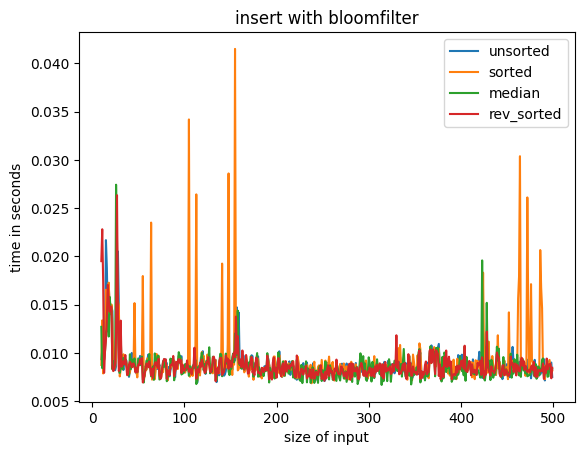

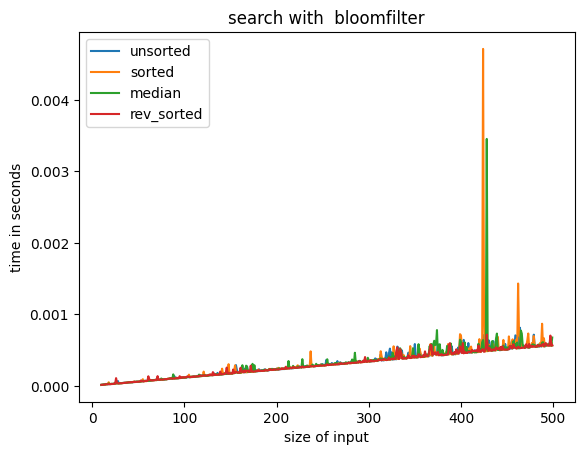

Inserting unsorted strings of size 10 into balanced_tree took 4.3082982301712036e-05 seconds
Searching unsorted strings of size 10 into balanced_tree took 4.3082982301712036e-05 seconds
____________________________________________________
Inserting sorted strings of size 10 into balanced_tree took 1.491699367761612e-05 seconds
Searching sorted strings of size 10 into balanced_tree took 1.491699367761612e-05 seconds
____________________________________________________
Inserting median strings of size 10 into balanced_tree took 1.0083196684718132e-05 seconds
Searching median strings of size 10 into balanced_tree took 1.0083196684718132e-05 seconds
____________________________________________________
Inserting rev_sorted strings of size 10 into balanced_tree took 1.4082994312047958e-05 seconds
Searching rev_sorted strings of size 10 into balanced_tree took 1.4082994312047958e-05 seconds
____________________________________________________
Inserting unsorted strings of size 11 into balance

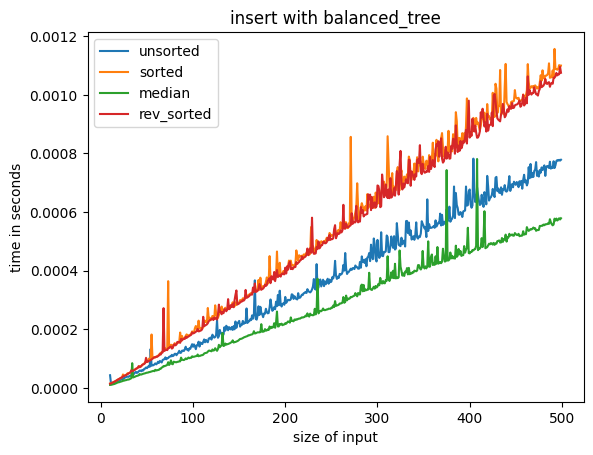

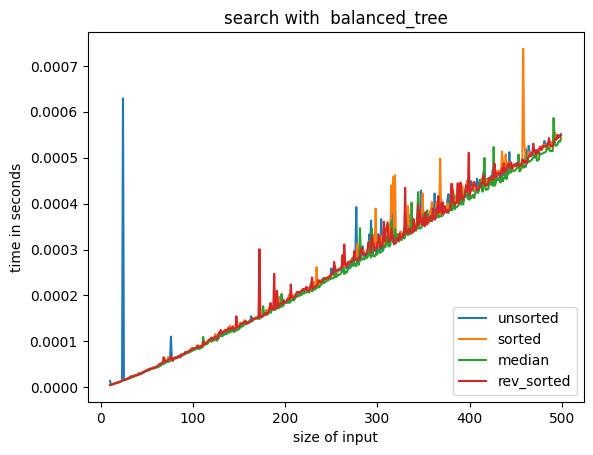

Inserting unsorted strings of size 10 into bst took 2.133403904736042e-05 seconds
Searching unsorted strings of size 10 into bst took 2.133403904736042e-05 seconds
____________________________________________________
Inserting sorted strings of size 10 into bst took 9.875046089291573e-06 seconds
Searching sorted strings of size 10 into bst took 9.875046089291573e-06 seconds
____________________________________________________
Inserting median strings of size 10 into bst took 7.166992872953415e-06 seconds
Searching median strings of size 10 into bst took 7.166992872953415e-06 seconds
____________________________________________________
Inserting rev_sorted strings of size 10 into bst took 1.0250136256217957e-05 seconds
Searching rev_sorted strings of size 10 into bst took 1.0250136256217957e-05 seconds
____________________________________________________
Inserting unsorted strings of size 11 into bst took 7.58306123316288e-06 seconds
Searching unsorted strings of size 11 into bst took 7

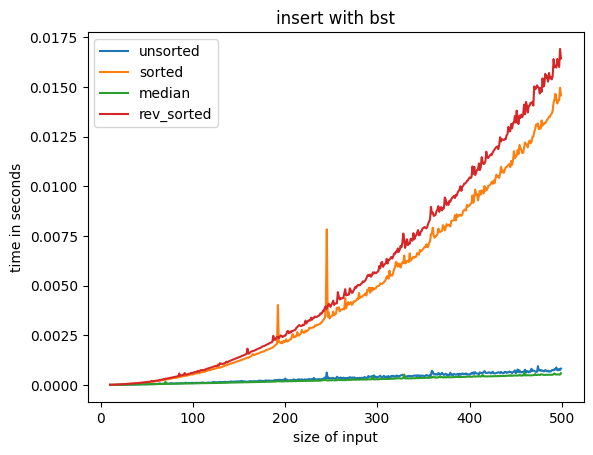

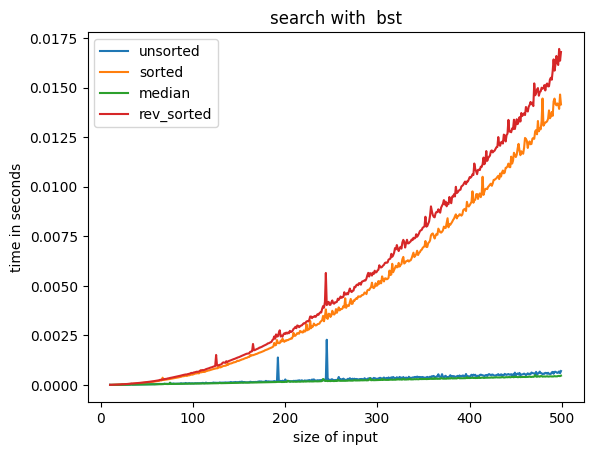

Inserting unsorted strings of size 10 into seq_search took 6.2908511608839035e-06 seconds
Searching unsorted strings of size 10 into seq_search took 6.2908511608839035e-06 seconds
____________________________________________________
Inserting sorted strings of size 10 into seq_search took 3.0829105526208878e-06 seconds
Searching sorted strings of size 10 into seq_search took 3.0829105526208878e-06 seconds
____________________________________________________
Inserting median strings of size 10 into seq_search took 2.874992787837982e-06 seconds
Searching median strings of size 10 into seq_search took 2.874992787837982e-06 seconds
____________________________________________________
Inserting rev_sorted strings of size 10 into seq_search took 2.5408808141946793e-06 seconds
Searching rev_sorted strings of size 10 into seq_search took 2.5408808141946793e-06 seconds
____________________________________________________
Inserting unsorted strings of size 11 into seq_search took 2.7909409254789

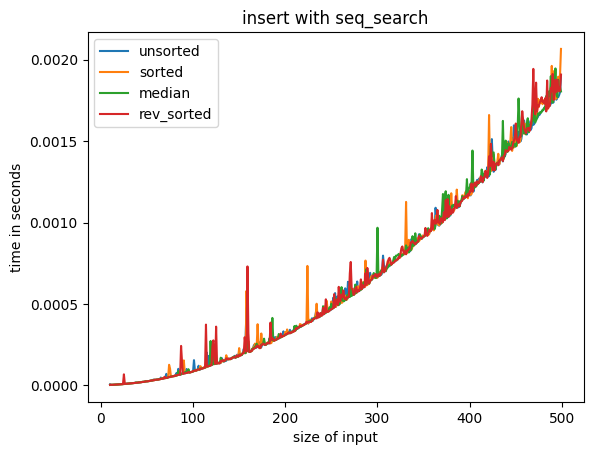

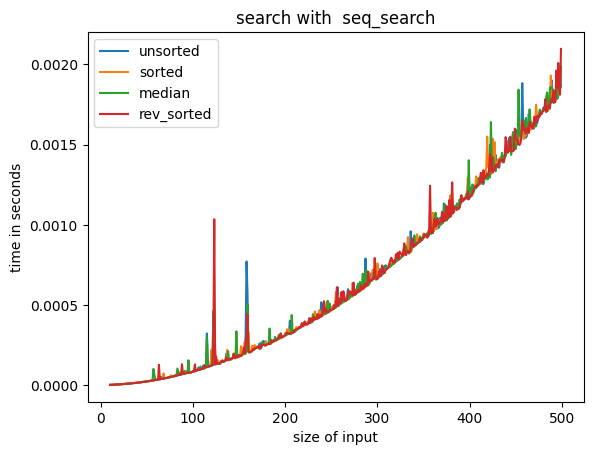

In [76]:
import timeit
iterations = 1
data_generator = TestDataGenerator(length=10)
datastuctures = {"bloomfilter": BloomFilterSet, "balanced_tree": BalancedSearchTreeSet, "bst": BinarySearchTreeSet, "seq_search":SequentialSearchSet}
test_type = {"unsorted":data_generator.generateData, "sorted":data_generator.generateSorted  ,"median": data_generator.generateBestCaseBinary, "rev_sorted": data_generator.generateReverseSorted}
created_dst={}


def insert(key, list):
    data_structure = datastuctures[key]()
    for word in list:
            data_structure.insertElement(word)
    created_dst[key] = data_structure

def search(key, list):
    for word in list:
        dst = created_dst[key]
        if (dst.searchElement(word)):
            pass
        else:
            pass
count = 500

def test_unsorted():
    times_insert={"bloomfilter":[], "balanced_tree":[]  ,"bst": [], "seq_search":[]}
    times_search={"bloomfilter":[], "balanced_tree":[]  ,"bst": [], "seq_search":[]}
    for i in range(10,count):
        list = data_generator.generateData(i)
        for key in datastuctures:
            insertion_time = timeit.timeit(lambda: insert(key, list), number=iterations)
            times_insert[key].append(insertion_time/iterations)
            print("Inserting strings of size " + str(i) + " into " + key + " took " + str(insertion_time/iterations) + " seconds")
            search_time = timeit.timeit(lambda: search(key, list), number=iterations)
            print("Searching strings of size " + str(i) + " into " + key + " took " + str(insertion_time/iterations) + " seconds")
            times_search[key].append(search_time/iterations)
            print("____________________________________________________")
    graph(times_insert, "insert with unsorted data",count)
    graph(times_search, "search with unsorted data",count)
# test_unsorted()      
print("____________________________________________________")
def test_sorted():
    times_insert={"bloomfilter":[], "balanced_tree":[]  ,"bst": [], "seq_search":[]}
    times_search={"bloomfilter":[], "balanced_tree":[]  ,"bst": [], "seq_search":[]}
    for i in range(10,count):
        list = data_generator.generateSorted(i)
        for key in datastuctures:
            insertion_time = timeit.timeit(lambda: insert(key, list), number=iterations)
            times_insert[key].append(insertion_time/iterations)
            print("Inserting strings of size " + str(i) + " into " + key + " took " + str(insertion_time/iterations) + " seconds")
            search_time = timeit.timeit(lambda: search(key, list), number=iterations)
            print("Searching strings of size " + str(i) + " into " + key + " took " + str(insertion_time/iterations) + " seconds")
            times_search[key].append(search_time/iterations)
            print("____________________________________________________")
    graph(times_insert, "insert with sorted data",count)
    graph(times_search, "search with sorted data",count)
# test_sorted()
def test_reverse_sorted():
    times_insert={"bloomfilter":[], "balanced_tree":[]  ,"bst": [], "seq_search":[]}
    times_search={"bloomfilter":[], "balanced_tree":[]  ,"bst": [], "seq_search":[]}
    for i in range(10,count):
        list = data_generator.generateReverseSorted(i)
        for key in datastuctures:
            insertion_time = timeit.timeit(lambda: insert(key, list), number=iterations)
            times_insert[key].append(insertion_time/iterations)
            print("Inserting strings of size " + str(i) + " into " + key + " took " + str(insertion_time/iterations) + " seconds")
            search_time = timeit.timeit(lambda: search(key, list), number=iterations)
            print("Searching strings of size " + str(i) + " into " + key + " took " + str(insertion_time/iterations) + " seconds")
            times_search[key].append(search_time/iterations)
            print("____________________________________________________")
    graph(times_insert, "insert with reverse sorted data",count)
    graph(times_search, "search with reverse sorted data",count)
# test_reverse_sorted()
def test_median_binary():
    times_insert={"bloomfilter":[], "balanced_tree":[]  ,"bst": [], "seq_search":[]}
    times_search={"bloomfilter":[], "balanced_tree":[]  ,"bst": [], "seq_search":[]}
    for i in range(10,count):
        list = data_generator.generateBestCaseBinary(i)
        for key in datastuctures:
            insertion_time = timeit.timeit(lambda: insert(key, list), number=iterations)
            times_insert[key].append(insertion_time/iterations)
            print("Inserting strings of size " + str(i) + " into " + key + " took " + str(insertion_time/iterations) + " seconds")
            search_time = timeit.timeit(lambda: search(key, list), number=iterations)
            print("Searching strings of size " + str(i) + " into " + key + " took " + str(insertion_time/iterations) + " seconds")
            times_search[key].append(search_time/iterations)
            print("____________________________________________________")
    graph(times_insert, "insert with median sorted data",count)
    graph(times_search, "search with median sorted data",count)
# test_median_binary()


def test_per_dst():
    for key in datastuctures:
        times_insert={"unsorted":[], "sorted":[]  ,"median": [], "rev_sorted":[]}
        times_search={"unsorted":[], "sorted":[]  ,"median": [], "rev_sorted":[]}
        for i in range(10,count):
            for test in test_type:
                list = test_type[test](i)
                insertion_time = timeit.timeit(lambda: insert(key, list), number=iterations)
                times_insert[test].append(insertion_time/iterations)
                print("Inserting " + str(test)+ " strings of size " + str(i) + " into " + key + " took " + str(insertion_time/iterations) + " seconds")
                search_time = timeit.timeit(lambda: search(key, list), number=iterations)
                print("Searching " + str(test)+ " strings of size " + str(i) + " into " + key + " took " + str(insertion_time/iterations) + " seconds")
                times_search[test].append(search_time/iterations)
                print("____________________________________________________")
        graph(times_insert, "insert with "+ str(key),count)
        graph(times_search, "search with  "+ str(key),count)
test_per_dst()